In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/cleaned_data_v7.csv')

In [3]:
df.shape

(5670, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PROPERTY_TYPE        5670 non-null   object 
 1   CITY                 5670 non-null   object 
 2   BEDROOM_NUM          5670 non-null   float64
 3   PRICE_PER_UNIT_AREA  5670 non-null   int64  
 4   FURNISH              5670 non-null   int64  
 5   AGE                  5670 non-null   int64  
 6   AREA                 5670 non-null   float64
 7   SOCIETY_NAME         5670 non-null   object 
 8   BALCONY_NUM          5670 non-null   float64
 9   FLOOR_NUM            5670 non-null   float64
 10  Location             5670 non-null   object 
 11  price                5670 non-null   float64
 12  no_of_landmarks      5670 non-null   int64  
 13  FEATURES_SCORE       5670 non-null   int64  
 14  AMENITIES_SCORE      5670 non-null   int64  
dtypes: float64(5), int64(6), object(4)
mem

In [5]:
df.head()

,PROPERTY_TYPE,CITY,BEDROOM_NUM,PRICE_PER_UNIT_AREA,FURNISH,AGE,AREA,SOCIETY_NAME,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,FEATURES_SCORE,AMENITIES_SCORE
0,Residential Apartment,Kolkata South,2.0,3662,0,5,570.5,srijan star swapno puron,1.0,1.0,Amtala,0.191,2,0,0
1,Residential Apartment,Kolkata South,3.0,10500,0,5,1115.5,natural quest,1.0,1.0,EM Bypass,1.175,6,0,0
2,Residential Apartment,Kolkata South,3.0,8900,0,5,1446.0,ganguly 4sight eminence,1.0,1.0,Garia,1.285,5,0,0
3,Residential Apartment,Kolkata South,3.0,5215,0,5,1295.0,dtc sojon,1.0,1.0,Joka,0.675,10,0,0
4,Residential Apartment,Kolkata South,2.0,5108,0,5,920.0,dtc sojon,1.0,1.0,Joka,0.470,10,0,0


In [6]:
train_df = df.drop(columns=['SOCIETY_NAME','PRICE_PER_UNIT_AREA','FEATURES_SCORE'])

<Axes: >

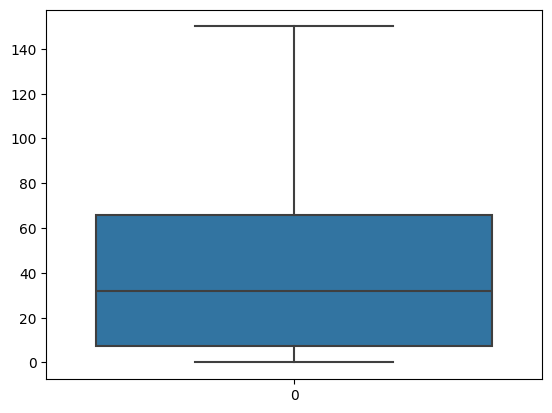

In [7]:
sns.boxplot(df['AMENITIES_SCORE'])

In [8]:
df['AMENITIES_SCORE'].describe()

count    5670.000000
mean       41.233686
std        37.616290
min         0.000000
25%         7.250000
50%        32.000000
75%        66.000000
max       150.000000
Name: AMENITIES_SCORE, dtype: float64

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 100:
        return "Medium"
    elif 100 <= score <= 150:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['AMENITIES_SCORE'].apply(categorize_luxury)

In [11]:
train_df.head()

,PROPERTY_TYPE,CITY,BEDROOM_NUM,FURNISH,AGE,AREA,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,AMENITIES_SCORE,luxury_category
0,Residential Apartment,Kolkata South,2.0,0,5,570.5,1.0,1.0,Amtala,0.191,2,0,Low
1,Residential Apartment,Kolkata South,3.0,0,5,1115.5,1.0,1.0,EM Bypass,1.175,6,0,Low
2,Residential Apartment,Kolkata South,3.0,0,5,1446.0,1.0,1.0,Garia,1.285,5,0,Low
3,Residential Apartment,Kolkata South,3.0,0,5,1295.0,1.0,1.0,Joka,0.675,10,0,Low
4,Residential Apartment,Kolkata South,2.0,0,5,920.0,1.0,1.0,Joka,0.470,10,0,Low


<Axes: >

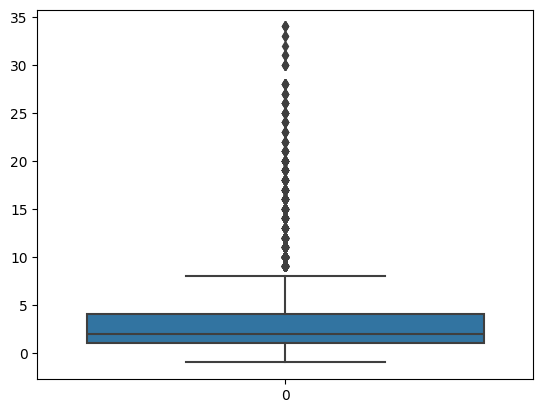

In [12]:
sns.boxplot(df['FLOOR_NUM'])

In [13]:
df['FLOOR_NUM'].describe()

count    5670.000000
mean        4.079541
std         4.624460
min        -1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        34.000000
Name: FLOOR_NUM, dtype: float64

In [14]:
def categorize_floor(floor):
    if -1 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 50:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [15]:
train_df['floor_category'] = train_df['FLOOR_NUM'].apply(categorize_floor)

In [16]:
train_df.head()

,PROPERTY_TYPE,CITY,BEDROOM_NUM,FURNISH,AGE,AREA,BALCONY_NUM,FLOOR_NUM,Location,price,no_of_landmarks,AMENITIES_SCORE,luxury_category,floor_category
0,Residential Apartment,Kolkata South,2.0,0,5,570.5,1.0,1.0,Amtala,0.191,2,0,Low,Low Floor
1,Residential Apartment,Kolkata South,3.0,0,5,1115.5,1.0,1.0,EM Bypass,1.175,6,0,Low,Low Floor
2,Residential Apartment,Kolkata South,3.0,0,5,1446.0,1.0,1.0,Garia,1.285,5,0,Low,Low Floor
3,Residential Apartment,Kolkata South,3.0,0,5,1295.0,1.0,1.0,Joka,0.675,10,0,Low,Low Floor
4,Residential Apartment,Kolkata South,2.0,0,5,920.0,1.0,1.0,Joka,0.470,10,0,Low,Low Floor


In [17]:
train_df.drop(columns=['FLOOR_NUM','AMENITIES_SCORE'],inplace=True)

In [18]:
train_df.drop(columns=['FURNISH'],inplace=True)

In [19]:
train_df.head()

,PROPERTY_TYPE,CITY,BEDROOM_NUM,AGE,AREA,BALCONY_NUM,Location,price,no_of_landmarks,luxury_category,floor_category
0,Residential Apartment,Kolkata South,2.0,5,570.5,1.0,Amtala,0.191,2,Low,Low Floor
1,Residential Apartment,Kolkata South,3.0,5,1115.5,1.0,EM Bypass,1.175,6,Low,Low Floor
2,Residential Apartment,Kolkata South,3.0,5,1446.0,1.0,Garia,1.285,5,Low,Low Floor
3,Residential Apartment,Kolkata South,3.0,5,1295.0,1.0,Joka,0.675,10,Low,Low Floor
4,Residential Apartment,Kolkata South,2.0,5,920.0,1.0,Joka,0.470,10,Low,Low Floor


In [20]:
train_df['AGE'].value_counts()

AGE
1    2184
5    1454
6     923
2     679
3     430
Name: count, dtype: int64

In [21]:
bins = [0, 3, 5, 7]  # Adjust the bin boundaries as needed
labels = ['New Property', 'Intermediate', 'Old Property']
train_df['age_category'] = pd.cut(train_df['AGE'], bins=bins, labels=labels,right=False)

In [22]:
train_df

,PROPERTY_TYPE,CITY,BEDROOM_NUM,AGE,AREA,BALCONY_NUM,Location,price,no_of_landmarks,luxury_category,floor_category,age_category
0,Residential Apartment,Kolkata South,2.0,5,570.5,1.0,Amtala,0.191,2,Low,Low Floor,Old Property
1,Residential Apartment,Kolkata South,3.0,5,1115.5,1.0,EM Bypass,1.175,6,Low,Low Floor,Old Property
2,Residential Apartment,Kolkata South,3.0,5,1446.0,1.0,Garia,1.285,5,Low,Low Floor,Old Property
3,Residential Apartment,Kolkata South,3.0,5,1295.0,1.0,Joka,0.675,10,Low,Low Floor,Old Property
4,Residential Apartment,Kolkata South,2.0,5,920.0,1.0,Joka,0.470,10,Low,Low Floor,Old Property
...,...,...,...,...,...,...,...,...,...,...,...,...
5665,Residential Apartment,Kolkata South,4.0,1,3528.0,1.0,EM Bypass,5.300,11,Medium,Mid Floor,New Property
5666,Residential Apartment,Kolkata South,3.0,3,2000.0,1.0,New Alipore,1.800,7,Low,Low Floor,Intermediate
5667,Residential Apartment,Kolkata South,3.0,2,1843.0,2.0,Chak Garia,1.550,8,Medium,High Floor,New Property
5668,Residential Apartment,Kolkata South,3.0,2,2079.0,2.0,Chak Garia,1.750,8,Medium,Mid Floor,New Property


In [23]:
train_df['age_category'].value_counts()

age_category
New Property    2863
Old Property    2377
Intermediate     430
Name: count, dtype: int64

In [24]:
train_df.drop(columns=['AGE'],inplace=True)

In [25]:
train_df['no_of_landmarks'].value_counts()

no_of_landmarks
7     1358
6     1054
5      785
4      717
8      651
9      243
3      218
2      206
1      185
10     109
11      59
12      58
0       27
Name: count, dtype: int64

In [26]:
# Define bin edges and labels
bin_edges = [1, 3, 6, 9, 12]
bin_labels = ['Few Landmarks', 'Several Landmarks', 'Moderate Landmarks', 'Many Landmarks']

# Create a new categorical column
train_df['Landmark_Category'] = pd.cut(train_df['no_of_landmarks'], bins=bin_edges, labels=bin_labels, include_lowest=True)


In [28]:
train_df['Landmark_Category'].value_counts()

Landmark_Category
Several Landmarks     2556
Moderate Landmarks    2252
Few Landmarks          609
Many Landmarks         226
Name: count, dtype: int64

In [29]:
train_df.drop(columns=['no_of_landmarks'],inplace=True)

In [36]:
train_df['Landmark_Category'].fillna('Few Landmarks',inplace=True)

In [38]:
train_df['Landmark_Category'].value_counts()

Landmark_Category
Several Landmarks     2556
Moderate Landmarks    2252
Few Landmarks          636
Many Landmarks         226
Name: count, dtype: int64

In [39]:
train_df.to_csv('cleaned_data_v8_1.csv',index=False)

In [90]:
train_df['luxury_category'] = train_df['luxury_category'].astype('category')

In [91]:
train_df['floor_category'] = train_df['floor_category'].astype('category')

In [92]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PROPERTY_TYPE    5670 non-null   object  
 1   CITY             5670 non-null   object  
 2   BEDROOM_NUM      5670 non-null   float64 
 3   AREA             5670 non-null   float64 
 4   BALCONY_NUM      5670 non-null   float64 
 5   Location         5670 non-null   object  
 6   price            5670 non-null   float64 
 7   no_of_landmarks  5670 non-null   int64   
 8   luxury_category  5670 non-null   category
 9   floor_category   5670 non-null   category
 10  age_category     5670 non-null   category
dtypes: category(3), float64(4), int64(1), object(3)
memory usage: 371.5+ KB


In [93]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy(deep=True)

In [94]:
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['Independent House/Villa', 'Independent/Builder Floor',
       'Residential Apartment'], dtype=object)]
[array(['Kolkata Central', 'Kolkata East', 'Kolkata North',
       'Kolkata South', 'Kolkata West'], dtype=object)]
[array(['5/1B MM Feeder Road.Kolkata-700057', 'AA 1D NEWTOWN',
       'AJC Bose Road', 'Action Area 1', 'Action Area 2',
       'Action Area 2B', 'Action Area 2C', 'Action Area 3', 'Agarpara',
       'Airport', 'Ajoy Nagar', 'Alipore', 'Amarpalli',
       'Ambuja UDITA, Survey Park,Santoshpur', 'Amrabati', 'Amtala',
       'Anandapur', 'Anandapuri', 'Ananya', 'Andul Road',
       'Arabinda Pally', 'Ariadaha', 'Atghara', 'Atlas More, Narendrapur',
       'Auckland Square', 'Azadgarh', 'BANGUR AVENUE', 'BL Saha Road',
       'BT Road', 'BT collage, Jessore road', 'Bablatala', 'Badam Talla',
       'Badamtala', 'Badu', 'Bagha Jatin', 'Baghajatin Place', 'Baguiati',
       'Baguihati', 'Baishnabghata', 'Baishnabghata Bye Lane',
       'Bakul Bagan', 'Bakultala', 'Ba

In [97]:
categorical_cols1 = train_df.select_dtypes(include=['category']).columns
print(categorical_cols1)

Index(['luxury_category', 'floor_category', 'age_category'], dtype='object')


In [109]:
data_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PROPERTY_TYPE    5670 non-null   float64 
 1   CITY             5670 non-null   float64 
 2   BEDROOM_NUM      5670 non-null   float64 
 3   AREA             5670 non-null   float64 
 4   BALCONY_NUM      5670 non-null   float64 
 5   Location         5670 non-null   float64 
 6   price            5670 non-null   float64 
 7   no_of_landmarks  5670 non-null   int64   
 8   luxury_category  5670 non-null   category
 9   floor_category   5670 non-null   category
 10  age_category     5670 non-null   category
dtypes: category(3), float64(7), int64(1)
memory usage: 371.5 KB


In [112]:
#Apply label encoding to categorical columns
oe = OrdinalEncoder(categories=[['Low','Medium','High'],
                                    ['Low Floor','Mid Floor','High Floor'],
                                    ['Old Property','Intermediate','New Property']])

data_label_encoded[['luxury_category','floor_category','age_category']] = oe.fit_transform(data_label_encoded[['luxury_category','floor_category','age_category']])
print(oe.categories_)


[array(['Low', 'Medium', 'High'], dtype=object), array(['Low Floor', 'Mid Floor', 'High Floor'], dtype=object), array(['Old Property', 'Intermediate', 'New Property'], dtype=object)]


In [113]:
data_label_encoded

,PROPERTY_TYPE,CITY,BEDROOM_NUM,AREA,BALCONY_NUM,Location,price,no_of_landmarks,luxury_category,floor_category,age_category
0,2.0,3.0,2.0,570.5,1.0,15.0,0.191,2,0.0,0.0,0.0
1,2.0,3.0,3.0,1115.5,1.0,127.0,1.175,6,0.0,0.0,0.0
2,2.0,3.0,3.0,1446.0,1.0,140.0,1.285,5,0.0,0.0,0.0
3,2.0,3.0,3.0,1295.0,1.0,182.0,0.675,10,0.0,0.0,0.0
4,2.0,3.0,2.0,920.0,1.0,182.0,0.470,10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5665,2.0,3.0,4.0,3528.0,1.0,127.0,5.300,11,1.0,1.0,2.0
5666,2.0,3.0,3.0,2000.0,1.0,259.0,1.800,7,0.0,0.0,1.0
5667,2.0,3.0,3.0,1843.0,2.0,92.0,1.550,8,1.0,2.0,2.0
5668,2.0,3.0,3.0,2079.0,2.0,92.0,1.750,8,1.0,1.0,2.0


In [114]:
# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

In [115]:
X_label

,PROPERTY_TYPE,CITY,BEDROOM_NUM,AREA,BALCONY_NUM,Location,no_of_landmarks,luxury_category,floor_category,age_category
0,2.0,3.0,2.0,570.5,1.0,15.0,2,0.0,0.0,0.0
1,2.0,3.0,3.0,1115.5,1.0,127.0,6,0.0,0.0,0.0
2,2.0,3.0,3.0,1446.0,1.0,140.0,5,0.0,0.0,0.0
3,2.0,3.0,3.0,1295.0,1.0,182.0,10,0.0,0.0,0.0
4,2.0,3.0,2.0,920.0,1.0,182.0,10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
5665,2.0,3.0,4.0,3528.0,1.0,127.0,11,1.0,1.0,2.0
5666,2.0,3.0,3.0,2000.0,1.0,259.0,7,0.0,0.0,1.0
5667,2.0,3.0,3.0,1843.0,2.0,92.0,8,1.0,2.0,2.0
5668,2.0,3.0,3.0,2079.0,2.0,92.0,8,1.0,1.0,2.0


In [116]:
y_label

0       0.191
1       1.175
2       1.285
3       0.675
4       0.470
        ...  
5665    5.300
5666    1.800
5667    1.550
5668    1.750
5669    0.740
Name: price, Length: 5670, dtype: float64

## Technique 1 - Correlation Analysis

<Axes: >

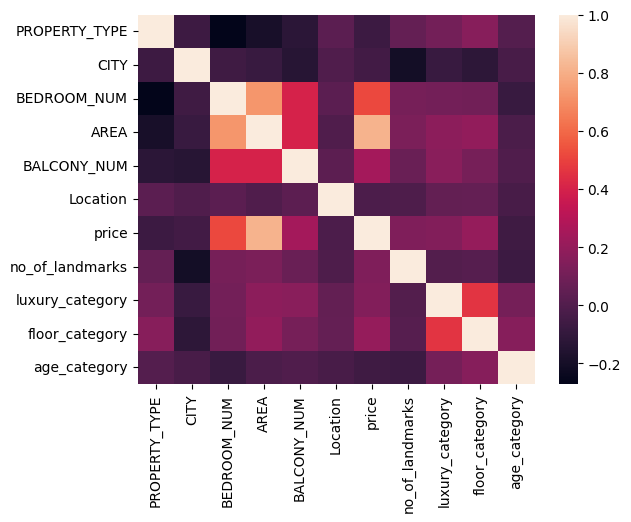

In [117]:
sns.heatmap(data_label_encoded.corr())

In [118]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,CITY,-0.052301
1,BEDROOM_NUM,0.516288
2,AREA,0.813167
3,BALCONY_NUM,0.246809
4,Location,-0.015631
5,price,1.000000
6,no_of_landmarks,0.139253
7,luxury_category,0.149007
8,floor_category,0.201574
9,age_category,-0.058930


## Technique 2 - Random Forest Feature Importance

In [119]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
3,AREA,0.774776
5,Location,0.058213
6,no_of_landmarks,0.040332
1,CITY,0.037209
2,BEDROOM_NUM,0.019935
9,age_category,0.016022
4,BALCONY_NUM,0.015041
8,floor_category,0.014637
7,luxury_category,0.012415
0,PROPERTY_TYPE,0.011420


## Technique 3 - Gradient Boosting Feature importances

In [120]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
3,AREA,0.818274
1,CITY,0.054477
5,Location,0.041462
6,no_of_landmarks,0.025369
0,PROPERTY_TYPE,0.020924
2,BEDROOM_NUM,0.013653
8,floor_category,0.012532
4,BALCONY_NUM,0.006268
9,age_category,0.003642
7,luxury_category,0.003398


## Technique 4 - Permutation Importance

In [121]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
3,AREA,1.323611
5,Location,0.076901
2,BEDROOM_NUM,0.041601
6,no_of_landmarks,0.032199
1,CITY,0.023930
9,age_category,0.011231
0,PROPERTY_TYPE,0.007357
4,BALCONY_NUM,0.006841
8,floor_category,0.005328
7,luxury_category,0.004324


## Technique 5 - LASSO

In [122]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
3,AREA,1.155563
0,PROPERTY_TYPE,0.069686
8,floor_category,0.047914
6,no_of_landmarks,0.035004
1,CITY,0.010226
7,luxury_category,-0.000000
5,Location,-0.001615
9,age_category,-0.055430
4,BALCONY_NUM,-0.090305
2,BEDROOM_NUM,-0.118671


## Technique 6 - RFE

In [123]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
3,AREA,0.781970
5,Location,0.054001
1,CITY,0.039020
6,no_of_landmarks,0.034678
2,BEDROOM_NUM,0.018763
9,age_category,0.015794
8,floor_category,0.015225
7,luxury_category,0.014875
4,BALCONY_NUM,0.014747
0,PROPERTY_TYPE,0.010926


## Technique 7 - Linear Regression Weights

In [124]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
3,AREA,1.193151
0,PROPERTY_TYPE,0.076125
8,floor_category,0.065351
6,no_of_landmarks,0.045699
1,CITY,0.022879
5,Location,-0.010543
7,luxury_category,-0.016364
9,age_category,-0.067539
4,BALCONY_NUM,-0.099491
2,BEDROOM_NUM,-0.151619


In [125]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')


In [126]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
CITY,-0.052301,0.037209,0.054477,0.023930,0.010226,0.039020,0.022879
BEDROOM_NUM,0.516288,0.019935,0.013653,0.041601,-0.118671,0.018763,-0.151619
AREA,0.813167,0.774776,0.818274,1.323611,1.155563,0.781970,1.193151
BALCONY_NUM,0.246809,0.015041,0.006268,0.006841,-0.090305,0.014747,-0.099491
Location,-0.015631,0.058213,0.041462,0.076901,-0.001615,0.054001,-0.010543
no_of_landmarks,0.139253,0.040332,0.025369,0.032199,0.035004,0.034678,0.045699
luxury_category,0.149007,0.012415,0.003398,0.004324,-0.000000,0.014875,-0.016364
floor_category,0.201574,0.014637,0.012532,0.005328,0.047914,0.015225,0.065351
age_category,-0.058930,0.016022,0.003642,0.011231,-0.055430,0.015794,-0.067539


In [127]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [128]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
AREA               0.819372
Location           0.051556
CITY               0.037103
no_of_landmarks    0.030718
BEDROOM_NUM        0.020086
floor_category     0.011623
age_category       0.010814
BALCONY_NUM        0.010253
luxury_category    0.008476
dtype: float64

In [129]:
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [130]:
scores.mean()

0.7309913715624087

In [135]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['no_of_landmarks']), y_label, cv=5, scoring='r2')

In [136]:
scores.mean()

0.7308456260645553

In [137]:
export_df = X_label.drop(columns=['no_of_landmarks'])
export_df['price'] = y_label

In [138]:
export_df

,PROPERTY_TYPE,CITY,BEDROOM_NUM,AREA,BALCONY_NUM,Location,luxury_category,floor_category,age_category,price
0,2.0,3.0,2.0,570.5,1.0,15.0,0.0,0.0,0.0,0.191
1,2.0,3.0,3.0,1115.5,1.0,127.0,0.0,0.0,0.0,1.175
2,2.0,3.0,3.0,1446.0,1.0,140.0,0.0,0.0,0.0,1.285
3,2.0,3.0,3.0,1295.0,1.0,182.0,0.0,0.0,0.0,0.675
4,2.0,3.0,2.0,920.0,1.0,182.0,0.0,0.0,0.0,0.470
...,...,...,...,...,...,...,...,...,...,...
5665,2.0,3.0,4.0,3528.0,1.0,127.0,1.0,1.0,2.0,5.300
5666,2.0,3.0,3.0,2000.0,1.0,259.0,0.0,0.0,1.0,1.800
5667,2.0,3.0,3.0,1843.0,2.0,92.0,1.0,2.0,2.0,1.550
5668,2.0,3.0,3.0,2079.0,2.0,92.0,1.0,1.0,2.0,1.750


In [139]:
export_df.to_csv('cleaned_data_v8.csv', index=False)